In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [2]:
baseline = pd.read_csv('baseline_eeg.csv')
baseline_chilled = pd.read_csv('baseline_chilled_eeg.csv')
easy_arithmetic = pd.read_csv('easy_arithmetic_eeg.csv')
hard_arithmetic = pd.read_csv('hard_arithmetic_eeg.csv')


In [3]:
x_baseline = baseline['timestamp'] - baseline['timestamp'][0]
y_baseline = baseline['ch1']

x_baseline_chilled = baseline_chilled['timestamp'] - baseline_chilled['timestamp'][0]
y_baseline_chilled = baseline_chilled['ch1']

x_easy_arithmetic = easy_arithmetic['timestamp'] - easy_arithmetic['timestamp'][0]
y_easy_arithmetic = easy_arithmetic['ch1']

x_hard_arithmetic = hard_arithmetic['timestamp'] - hard_arithmetic['timestamp'][0]
y_hard_arithmetic = hard_arithmetic['ch1']


In [4]:
def apply_filters(x, y):
    # notch filter to remove powerline noise
    notch_freq = 50  # set to 50 in Europe, 60 in North America
    numerator, denominator = signal.iirnotch(notch_freq, 20, 250)
    filtered_notch_data = signal.filtfilt(b=numerator, a=denominator, x=y, padtype=None)

    # bandpass filter to remove common artefacts during resting state recordings
    high_pass_freq = 1
    low_pass_freq = 35
    denom, nom = signal.iirfilter(int(3), [high_pass_freq, low_pass_freq], btype="bandpass", ftype="butter", fs=float(250), output="ba")
    filtered_bp_data = signal.filtfilt(b=denom, a=nom, x=y, padtype=None)
    
    return filtered_notch_data, filtered_bp_data



In [5]:
filtered_notch_data_baseline, filtered_bp_data_baseline = apply_filters(x_baseline, y_baseline)
filtered_notch_data_baseline_chilled, filtered_bp_data_baseline_chilled = apply_filters(x_baseline_chilled, y_baseline_chilled)
filtered_notch_data_easy_arithmetic, filtered_bp_data_easy_arithmetic = apply_filters(x_easy_arithmetic, y_easy_arithmetic)
filtered_notch_data_hard_arithmetic, filtered_bp_data_hard_arithmetic = apply_filters(x_hard_arithmetic, y_hard_arithmetic)

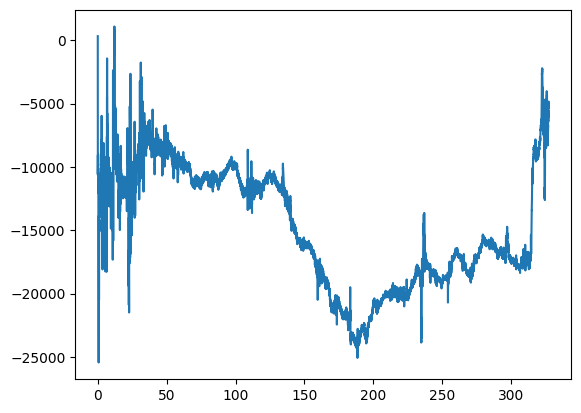

In [7]:
#visualize the data
plt.figure()
plt.plot(x_baseline, y_baseline, label='baseline')


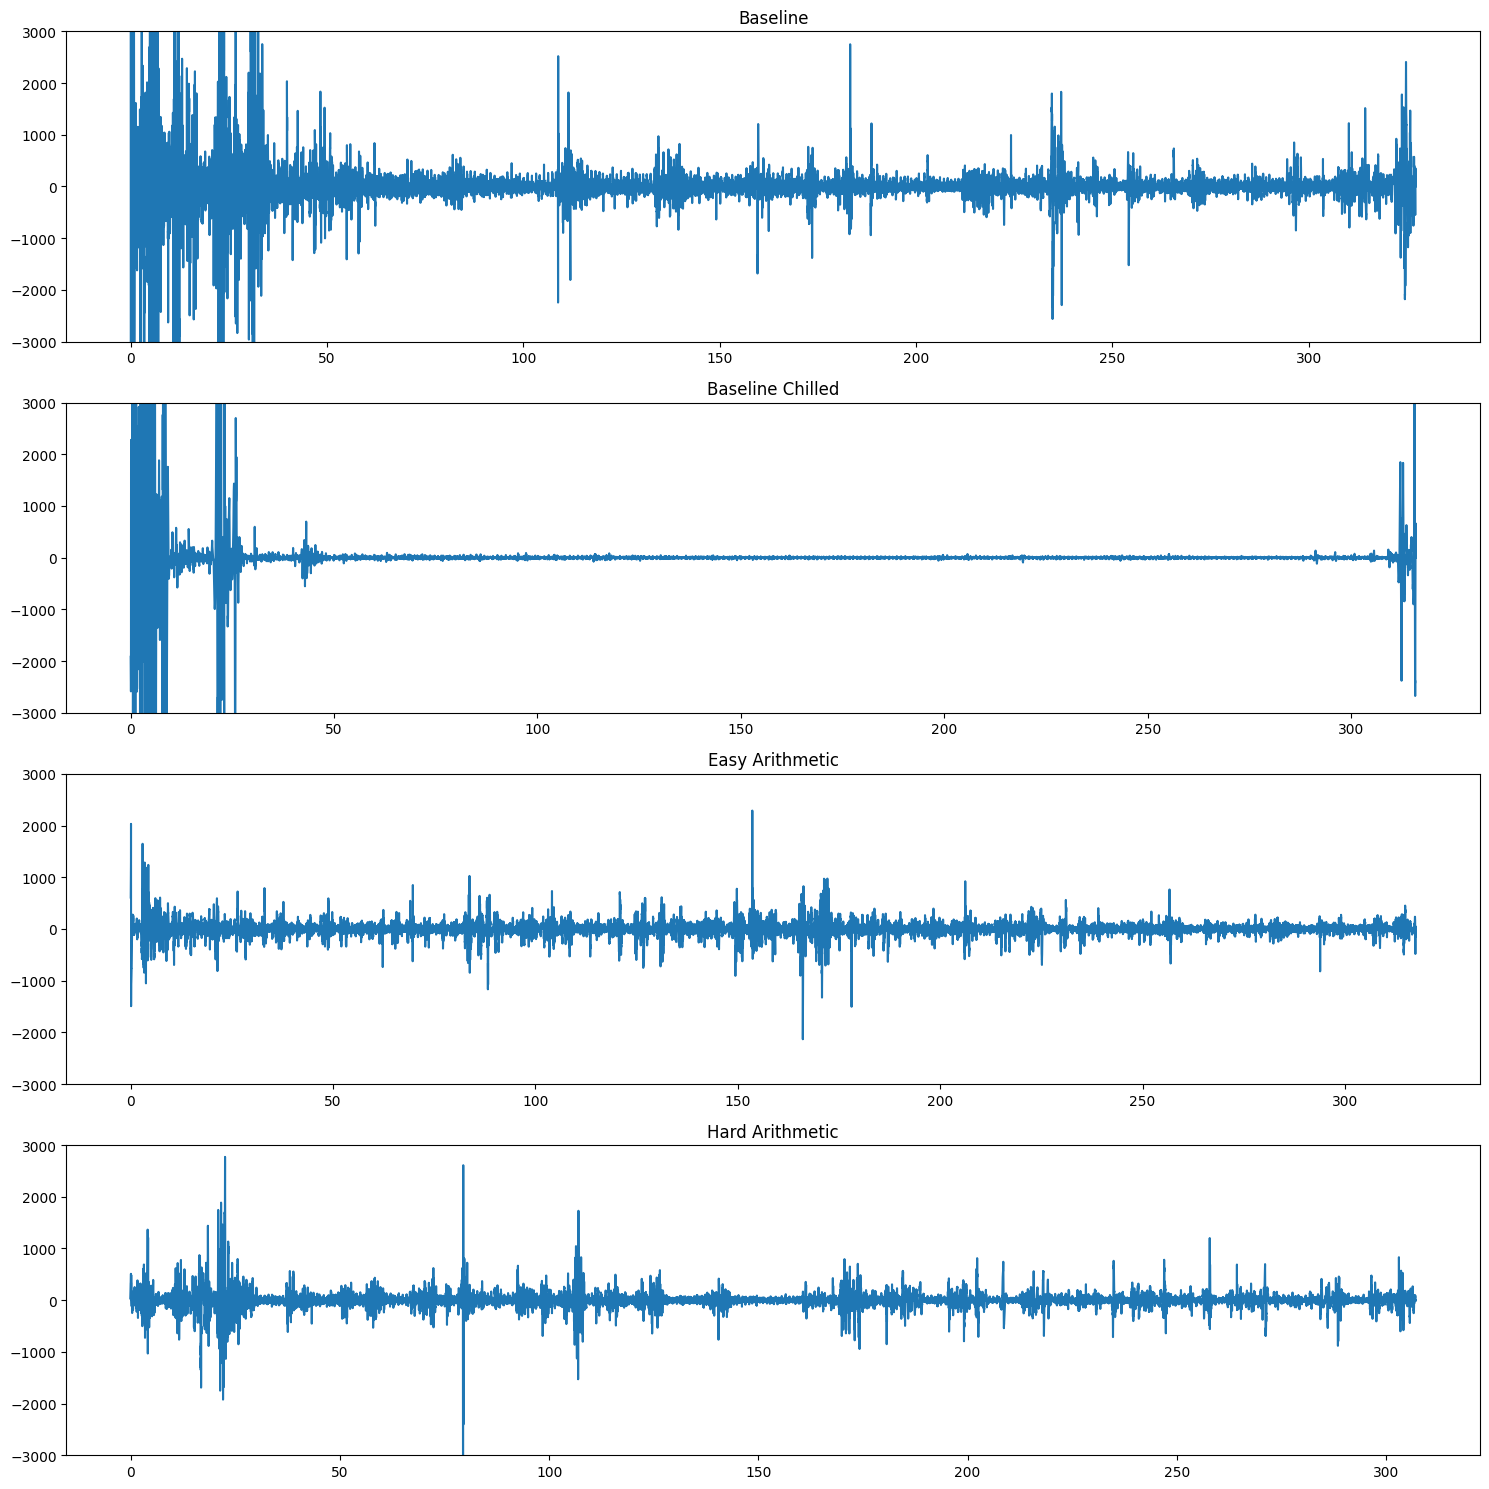

In [59]:
#visualize the data
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

axs[0].plot(x_baseline, filtered_bp_data_baseline, label='baseline')
axs[0].set_title('Baseline')

axs[1].plot(x_baseline_chilled, filtered_bp_data_baseline_chilled, label='baseline_chilled')
axs[1].set_title('Baseline Chilled')

axs[2].plot(x_easy_arithmetic, filtered_bp_data_easy_arithmetic, label='easy_arithmetic')
axs[2].set_title('Easy Arithmetic')

axs[3].plot(x_hard_arithmetic, filtered_bp_data_hard_arithmetic, label='hard_arithmetic')
axs[3].set_title('Hard Arithmetic')



#put all subplot in the same scale
for ax in axs:
    ax.set_ylim(-3000, 3000)

plt.tight_layout()
plt.show()


(-800.0, 800.0)

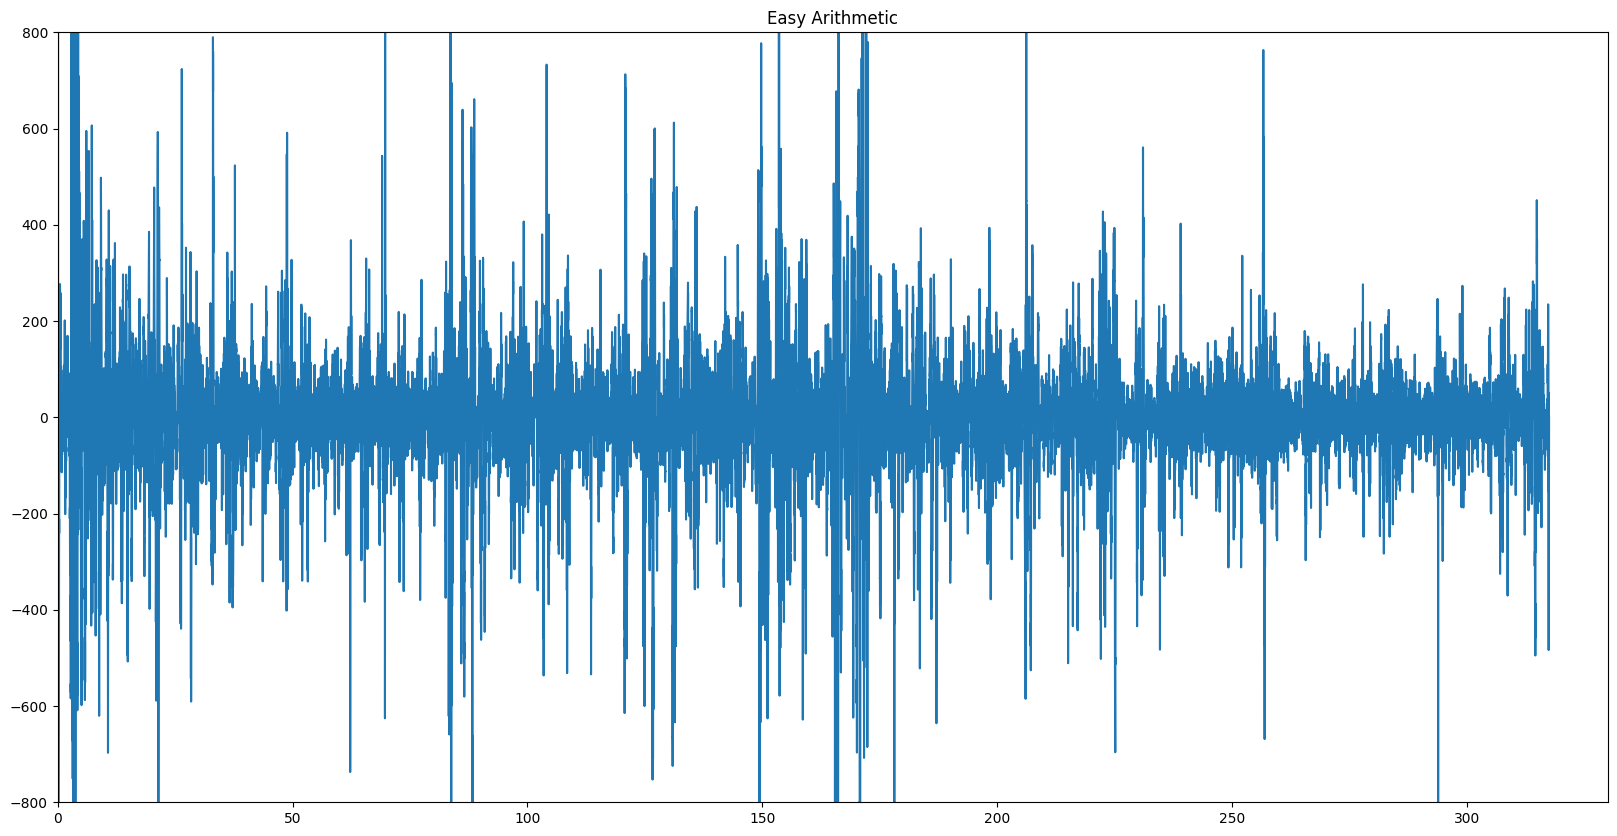

In [6]:
#plot easy arithmetic
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.plot(x_easy_arithmetic, filtered_bp_data_easy_arithmetic, label='easy_arithmetic')
axs.set_title('Easy Arithmetic')
axs.set_xlim(0, 330)
axs.set_ylim(-800, 800)

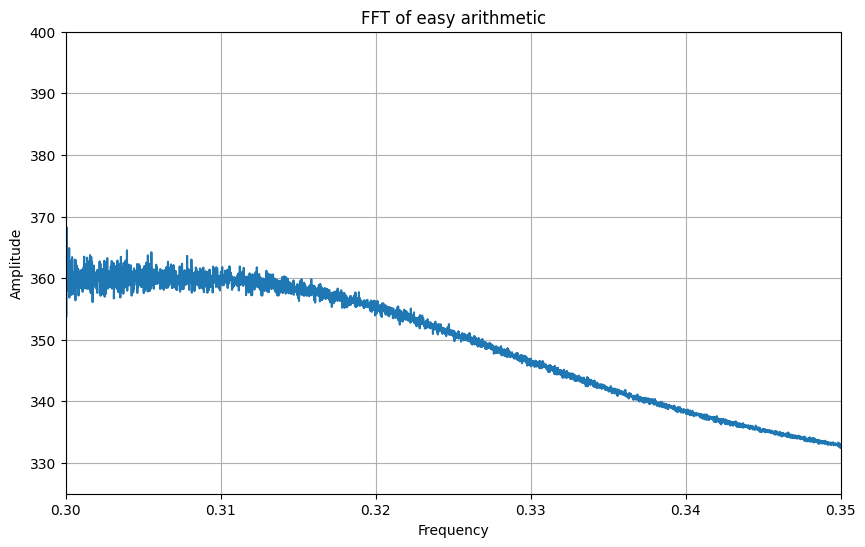

In [11]:
# Perform FFT
fft_result = np.fft.fft(filtered_bp_data_easy_arithmetic)
n = len(filtered_bp_data_easy_arithmetic)
frequencies = np.fft.fftfreq(n)

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of easy arithmetic')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
#set x scale fro 0.3 to 0.35
plt.xlim(0.3, 0.35)
plt.ylim(325, 400)
plt.show()

In [15]:
def plot_fft(data, title):
    fft_result = np.fft.fft(data)
    n = len(data)
    frequencies = np.fft.fftfreq(n)

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, np.abs(fft_result))
    plt.title(f'FFT of {title}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0.3, 0.35)
    plt.ylim(0, 1000)
    plt.show()